## Observations and Insights 

-Capomulin seemed to significantly reduce tumor volume over time in the mouse specimen I chose.
-From the Capomulin regimen, there appears to be a correlation between average tumor volume and 
the weight of the mice--the higher the weight of the mice, the higher the tumor volume.
-The Ketapril regimen had the highest tumor volume average along with the highest tumor volume variance
and the highest tumor volume standard error. So, this regimen may not be the most effective of the regimens tested.
More analysis is needed.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
allData = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")
# Display the data table for preview
allData.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
len(allData["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicateMice = allData.loc[allData.duplicated(subset=["Mouse ID", "Timepoint"]), "Mouse ID"]
duplicateMice


137     g989
360     g989
681     g989
869     g989
1111    g989
Name: Mouse ID, dtype: object

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicateMiceData = allData.loc[allData["Mouse ID"] == "g989"]
duplicateMiceData

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
allDataClean = allData[allData["Mouse ID"].isin(duplicateMice)==False]
allDataClean

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [6]:
# Checking the number of mice in the clean DataFrame.
len(allDataClean["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.



In [8]:
mean = allDataClean.groupby("Drug Regimen").mean()["Tumor Volume (mm3)"]
median = allDataClean.groupby("Drug Regimen").median()["Tumor Volume (mm3)"]
variance = allDataClean.groupby("Drug Regimen").var()["Tumor Volume (mm3)"]
standardDeviation = allDataClean.groupby("Drug Regimen").std()["Tumor Volume (mm3)"]
sem = allDataClean.groupby("Drug Regimen").sem()["Tumor Volume (mm3)"]

summaryTable = pd.DataFrame({
    "Mean Tumor Volume" : mean,
    "Median Tumor Volume" : median,
    "Variance Tumor Volume" : variance,
    "Tumor Volume Standard Deviation" : standardDeviation,
    "Tumor Volume Standard Error" : sem
})

summaryTable

,Mean Tumor Volume,Median Tumor Volume,Variance Tumor Volume,Tumor Volume Standard Deviation,Tumor Volume Standard Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line
summaryTableAgg = allDataClean.groupby("Drug Regimen").agg({
    "Tumor Volume (mm3)" : ["mean", "median", "var", "std", "sem"]
})
summaryTableAgg

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

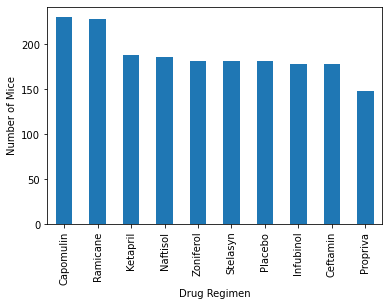

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
count = allDataClean["Drug Regimen"].value_counts()
count.plot(kind="bar")
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")
plt.show()

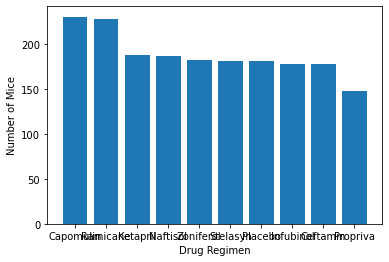

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
plt.bar(count.index.values, count.values)
plt.ylabel("Number of Mice")
plt.xlabel("Drug Regimen")
plt.show()


In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
count = allDataClean["Sex"].value_counts()
count


Male      958
Female    922
Name: Sex, dtype: int64

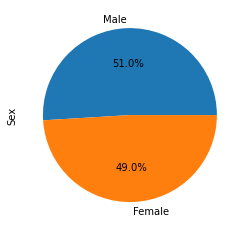

In [13]:
count.plot(kind="pie", autopct="%1.1f%%")
plt.show()

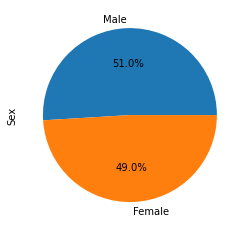

In [14]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
plt.pie(count.values, labels=count.index.values, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [15]:
# Start by getting the last (greatest) timepoint for each mouse
lastTimepoint = allDataClean.groupby("Mouse ID")["Timepoint"].max()
lastTimepoint = lastTimepoint.reset_index()
lastTimepoint.head()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
mergeDF = lastTimepoint.merge(allDataClean, on=["Mouse ID", "Timepoint"], how="left")
mergeDF.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29


In [16]:
print(mergeDF["Drug Regimen"].unique())

['Infubinol' 'Placebo' 'Ceftamin' 'Stelasyn' 'Zoniferol' 'Ramicane'
 'Ketapril' 'Propriva' 'Naftisol' 'Capomulin']


In [17]:
# Put treatments into a list for for loop (and later for plot labels)
drugRegimenList = ['Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn', 'Zoniferol', 'Ramicane',
 'Ketapril', 'Propriva', 'Naftisol', 'Capomulin']

# Create empty list to fill with tumor vol data (for plotting)
tumorVolDataList = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for d in drugRegimenList:
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    tumorVolCount = mergeDF.loc[mergeDF["Drug Regimen"]== d, "Tumor Volume (mm3)"]
    
    # add subset 
    tumorVolDataList.append(tumorVolCount)
    
    # Determine outliers using upper and lower bounds
    quartiles = tumorVolCount.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    innerq = upperq - lowerq
    lowerbound = lowerq - (1.5 * innerq)
    upperbound = upperq + (1.5 * innerq)
    outliers = tumorVolCount.loc[(tumorVolCount < lowerbound) | (tumorVolCount > upperbound)]
    print(f"{d}'s potential outliers: \n{outliers}\n")

Infubinol's potential outliers: 
31    36.321346
Name: Tumor Volume (mm3), dtype: float64

Placebo's potential outliers: 
Series([], Name: Tumor Volume (mm3), dtype: float64)

Ceftamin's potential outliers: 
Series([], Name: Tumor Volume (mm3), dtype: float64)

Stelasyn's potential outliers: 
Series([], Name: Tumor Volume (mm3), dtype: float64)

Zoniferol's potential outliers: 
Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane's potential outliers: 
Series([], Name: Tumor Volume (mm3), dtype: float64)

Ketapril's potential outliers: 
Series([], Name: Tumor Volume (mm3), dtype: float64)

Propriva's potential outliers: 
Series([], Name: Tumor Volume (mm3), dtype: float64)

Naftisol's potential outliers: 
Series([], Name: Tumor Volume (mm3), dtype: float64)

Capomulin's potential outliers: 
Series([], Name: Tumor Volume (mm3), dtype: float64)



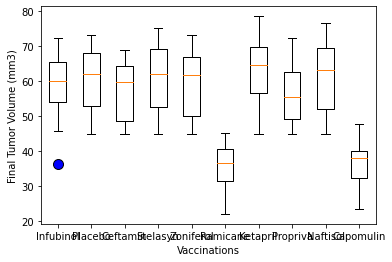

In [54]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
blue_out = dict(markerfacecolor="blue", markersize=10)
plt.boxplot(tumorVolDataList, labels=drugRegimenList, flierprops=blue_out)
plt.xlabel("Vaccinations")
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()

## Line and Scatter Plots

In [56]:
capomulin = allDataClean.loc[allDataClean["Drug Regimen"]=="Capomulin"]
capomulin.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
226,j246,0,45.0,0,Capomulin,Female,21,21
227,r554,0,45.0,0,Capomulin,Female,8,17
228,s185,0,45.0,0,Capomulin,Female,3,17
229,b742,0,45.0,0,Capomulin,Male,7,21


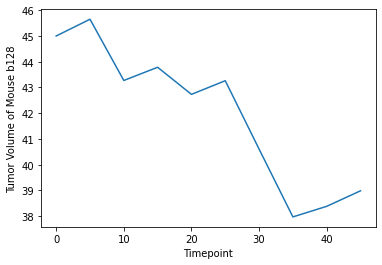

In [58]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

mouseData = capomulin.loc[capomulin["Mouse ID"]=="b128"]
plt.plot(mouseData["Timepoint"], mouseData["Tumor Volume (mm3)"])
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume of Mouse b128")
plt.show()

In [61]:
capomulinAve = capomulin.groupby("Mouse ID").mean()
capomulinAve.head()

,Timepoint,Tumor Volume (mm3),Metastatic Sites,Age_months,Weight (g)
Mouse ID,,,,,
b128,22.5,41.963636,0.7,9.0,22.0
b742,22.5,40.083699,0.0,7.0,21.0
f966,10.0,36.505973,0.0,16.0,17.0
g288,22.5,41.990097,0.8,3.0,19.0
g316,22.5,44.613344,1.0,22.0,22.0


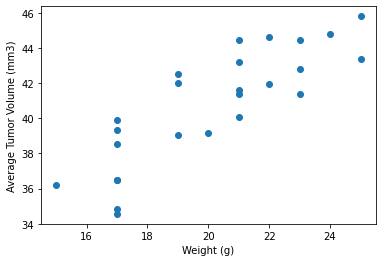

In [63]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
plt.scatter(capomulinAve["Weight (g)"], capomulinAve["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.show()

## Correlation and Regression

0.84


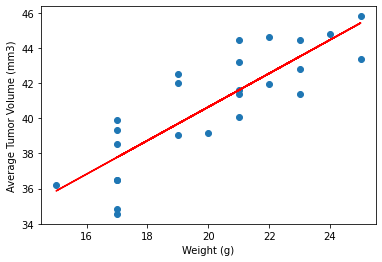

In [66]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation = round(st.pearsonr(capomulinAve["Weight (g)"], capomulinAve["Tumor Volume (mm3)"])[0], 2)
print(correlation)

model = st.linregress(capomulinAve["Weight (g)"], capomulinAve["Tumor Volume (mm3)"])
#print(model)

# y= mx + b 
yValues = capomulinAve["Weight (g)"] * model[0] + model[1]

#scatter plot
plt.scatter(capomulinAve["Weight (g)"], capomulinAve["Tumor Volume (mm3)"])
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")


# draw linear regression line on plot
plt.plot(capomulinAve["Weight (g)"], yValues, color="red")
plt.show()